 # The Human Eye

Write a Python script that accepts the TV specifications (size, resolution), the available distance for the
couch placement (from the TV), and outputs the “optimal” distance. Assume that the couch is placed
directly in front of the TV. You are expected to handle corner cases gracefully.

In [1]:
import math
# size parameter is size of tv screen
# resolution is in form of [width, height]
def find_optimal_distance(size, resolution):
    # for optimal result, spatial frequency must be around 60 cycles/degree
    # that is 120 dark and light colored bands
    width, height = resolution[0], resolution[1]
    # for size inches, width pixels are present
    # so for how many inches, 120 pixels will be present
    smallest_size = (120*size)/width
    # this many inches must subtend an angle of 1 degree from couch
    # so, tan(1/2) = (w/2) / optimal_distance
    optimal_distance = (smallest_size/2)/(math.tan(math.radians(1/2)))
    return optimal_distance

In [2]:
# 40 inches screen and 1920*1080 screen resolution
optimal_dist = find_optimal_distance(40, (1920, 1080))
optimal_dist

143.235812661637

Optimal distance for 40 inch screen size and 1920*1080 resolution is thus 143.23 inches or 3.64 meters

# The Basics

For this part, work with the images aerial, airplane, APC. Write a program to do the following:

Read the contents of an image into an array I (recall from class that digital images are represented as
an array of numbers).

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline
# to render images in gray 
plt.gray()

<Figure size 432x288 with 0 Axes>

Display the image I.

In [4]:
aerial = mpimg.imread('5.2.09.tiff')
airplane = mpimg.imread('7.1.02.tiff')
APC = mpimg.imread('7.1.08.tiff')
truck = mpimg.imread('7.1.01.tiff')
airport = mpimg.imread('5.3.02.tiff')

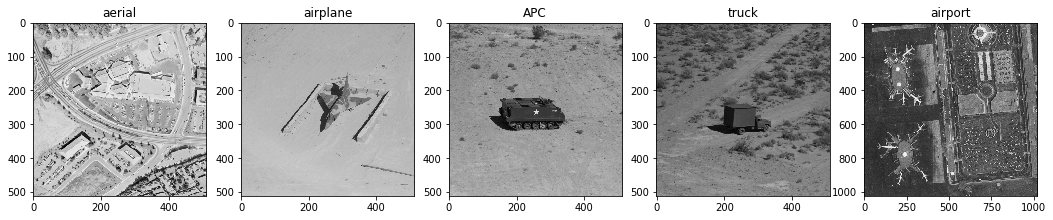

In [5]:
fig = plt.figure(figsize=(18,15))
ax=fig.add_subplot(1,5,1)
ax.set_title('aerial')
ax.imshow(aerial)
ax=fig.add_subplot(1,5,2)
ax.set_title('airplane')
ax.imshow(airplane)
ax=fig.add_subplot(1,5,3)
ax.set_title('APC')
ax.imshow(APC)
ax=fig.add_subplot(1,5,4)
ax.set_title('truck')
ax.imshow(truck)
ax=fig.add_subplot(1,5,5)
ax.set_title('airport')
ax.imshow(airport)

Print the maximum and minimum pixel values of I. Based on these values, how many bits are needed
(used) per pixel?

In [6]:
print("Maximum pixel value of aerial is " + str(np.max(aerial)))
print("Minimum pixel value of aerial is " + str(np.min(aerial)))
print("Since max pixel values are 255, aerial would require 8 bits per pixel")
print("Maximum pixel value of airplane is " + str(np.max(airplane)))
print("Minimum pixel value of airplane is " + str(np.min(airplane)))
print("Since max pixel values are 232, airplane would require 8 bits per pixel")
print("Maximum pixel value of APC is " + str(np.max(APC)))
print("Minimum pixel value of APC is " + str(np.min(APC)))
print("Since max pixel values are 248, APC would require 8 bits per pixel")

Maximum pixel value of aerial is 255
Minimum pixel value of aerial is 12
Since max pixel values are 255, aerial would require 8 bits per pixel
Maximum pixel value of airplane is 250
Minimum pixel value of airplane is 3
Since max pixel values are 232, airplane would require 8 bits per pixel
Maximum pixel value of APC is 215
Minimum pixel value of APC is 12
Since max pixel values are 248, APC would require 8 bits per pixel


What is the resolution of I?

In [7]:
print(aerial.shape)
print(airplane.shape)
print(APC.shape)

(512, 512)
(512, 512)
(512, 512)


Thus, Resolution of aerial is 512 * 512. <br>
Resolution of airplane is 512 * 512. <br>
Resolution of APC is 512 * 512. <br>

What is the size of the compressed image you downloaded?

In [8]:
import os
aerial_size = (os.stat('5.2.09.tiff').st_size) # in bytes
print("Size of aerial image is " + str(aerial_size/1024) + " KB")
airplane_size = (os.stat('7.1.02.tiff').st_size)
print("Size of airplane image is " + str(airplane_size/1024) + " KB")
apc_size = (os.stat('7.1.08.tiff').st_size)
print("Size of APC image is " + str(apc_size/1024) + " KB")

Size of aerial image is 256.130859375 KB
Size of airplane image is 256.130859375 KB
Size of APC image is 256.130859375 KB


Based on the previous answers and assuming 256 gray levels, how efficienctly is the image com-
pressed for storage?

In [9]:
# in bytes
# since each pixel requires 8 bits 
expected_aerial_size = (8*aerial.shape[0]*aerial.shape[1])/8 # converting to bytes hence dividing by 8
print("Expected size of aerial should be " + str(expected_aerial_size) + " bytes")
print("Compression ratio of aerial is "+ str(expected_aerial_size/aerial_size))
expected_airplane_size = (8*airplane.shape[0]*airplane.shape[1])/8
print("Expected size should of airplane be " + str(expected_airplane_size) + " bytes")
print("Compression ratio of airplane is "+ str(expected_airplane_size/airplane_size))
expected_apc_size = (8*APC.shape[0]*APC.shape[1])/8
print("Expected size should of APC be " + str(expected_apc_size) + " bytes")
print("Compression ratio of APC is "+ str(expected_apc_size/apc_size))

Expected size of aerial should be 262144.0 bytes
Compression ratio of aerial is 0.9994890917270988
Expected size should of airplane be 262144.0 bytes
Compression ratio of airplane is 0.9994890917270988
Expected size should of APC be 262144.0 bytes
Compression ratio of APC is 0.9994890917270988


Since, actual size of images are more than expecteed size, hence these images are not compressed for storage

Display each bitplane of the image I as a binary image.

In [10]:
def nth_bitplane(img, n):
    width = img.shape[1]
    height = img.shape[0]
    nth_bitplane_img = np.zeros((height, width), dtype='int')
    for row in range(height):
        for col in range(width):
            nth_bitplane_img[row][col] = 1 if ((img[row][col] & (1<<n))!= 0) else 0
    return nth_bitplane_img

In [11]:
def display_each_bitplane(image):
    fig = plt.figure(figsize=(15,18))
    zero_bitplane_img = nth_bitplane(image, 0)
    ax=fig.add_subplot(4,2,1)
    ax.set_title('first bitplane')
    ax.imshow(zero_bitplane_img, vmin=0, vmax=1)
    first_bitplane_img = nth_bitplane(image, 1)
    ax=fig.add_subplot(4,2,2)
    ax.set_title('second bitplane')
    ax.imshow(first_bitplane_img, vmin=0, vmax=1)
    second_bitplane_img = nth_bitplane(image, 2)
    ax=fig.add_subplot(4,2,3)
    ax.set_title('third bitplane')
    ax.imshow(second_bitplane_img, vmin=0, vmax=1)
    third_bitplane_img = nth_bitplane(image, 3)
    ax=fig.add_subplot(4,2,4)
    ax.set_title('fourth bitplane')
    ax.imshow(third_bitplane_img, vmin=0, vmax=1)
    fourth_bitplane_img = nth_bitplane(image, 4)
    ax=fig.add_subplot(4,2,5)
    ax.set_title('fifth bitplane')
    ax.imshow(fourth_bitplane_img, vmin=0, vmax=1)
    fifth_bitplane_img = nth_bitplane(image, 5)
    ax=fig.add_subplot(4,2,6)
    ax.set_title('sixth bitplane')
    ax.imshow(fifth_bitplane_img, vmin=0, vmax=1)
    sixth_bitplane_img = nth_bitplane(image, 6)
    ax=fig.add_subplot(4,2,7)
    ax.set_title('seventh bitplane')
    ax.imshow(sixth_bitplane_img, vmin=0, vmax=1)
    seventh_bitplane_img = nth_bitplane(image, 7)
    ax=fig.add_subplot(4,2,8)
    ax.set_title('eighth bitplane')
    ax.imshow(seventh_bitplane_img, vmin=0, vmax=1)

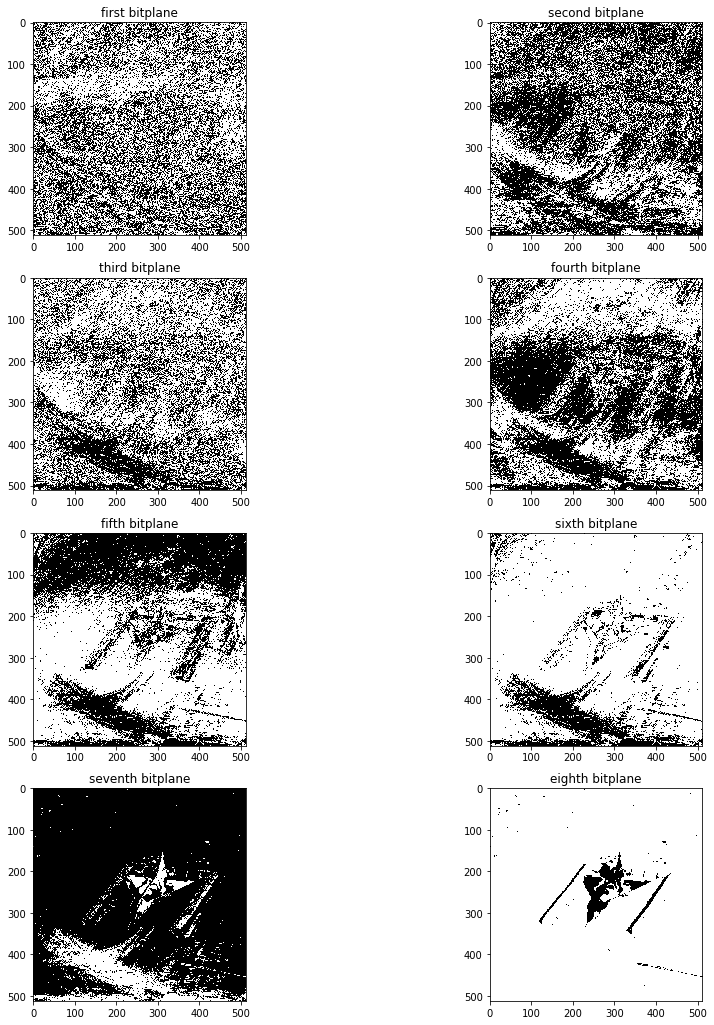

In [12]:
display_each_bitplane(airplane)

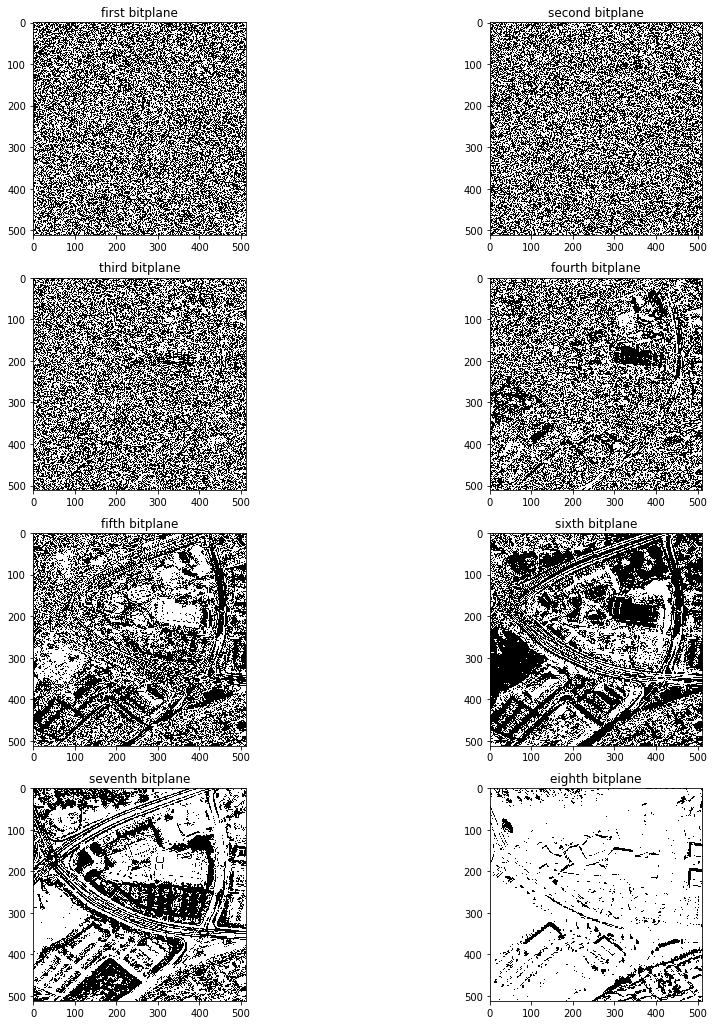

In [13]:
display_each_bitplane(aerial)

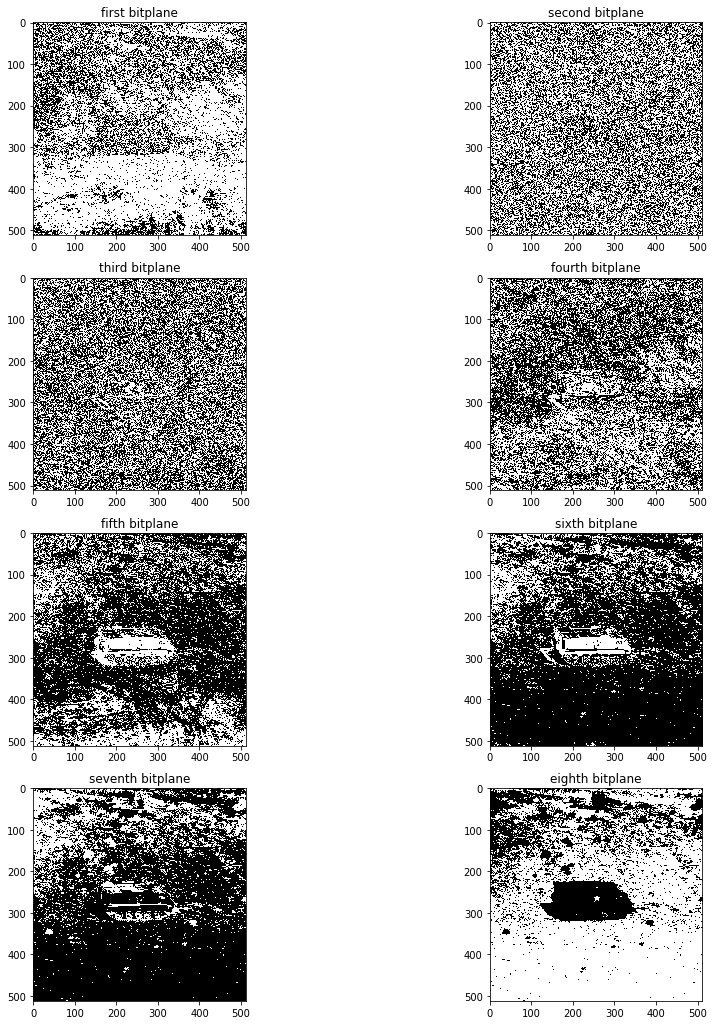

In [14]:
display_each_bitplane(APC)

Starting with the lowest bitplane, set each bitplane to 0 and display the resulting gray scale image
(you will ultimately display a black image). Can you draw any conclusions on the importance of one
bitplane over another.

In [15]:
def set_zeros_bitplane(img):
    fig = plt.figure(figsize=(15,18))
    width = img.shape[0]
    height = img.shape[1]
    new_image_with_zeros_bitplane = np.copy(img)
    # set ith bitplane to zero
    for i in range(8):
        for row in range(height):
            for col in range(width):
                # ~(1<<i) is used to set ith bit zero since ith bit is 0 in that and rest 1
                new_image_with_zeros_bitplane[row][col] = new_image_with_zeros_bitplane[row][col] & ~(1<<i)
        ax=fig.add_subplot(4, 2, i+1)
        ax.set_title(str(i+1) + 'th bitplane set to 0')
        ax.imshow(new_image_with_zeros_bitplane)

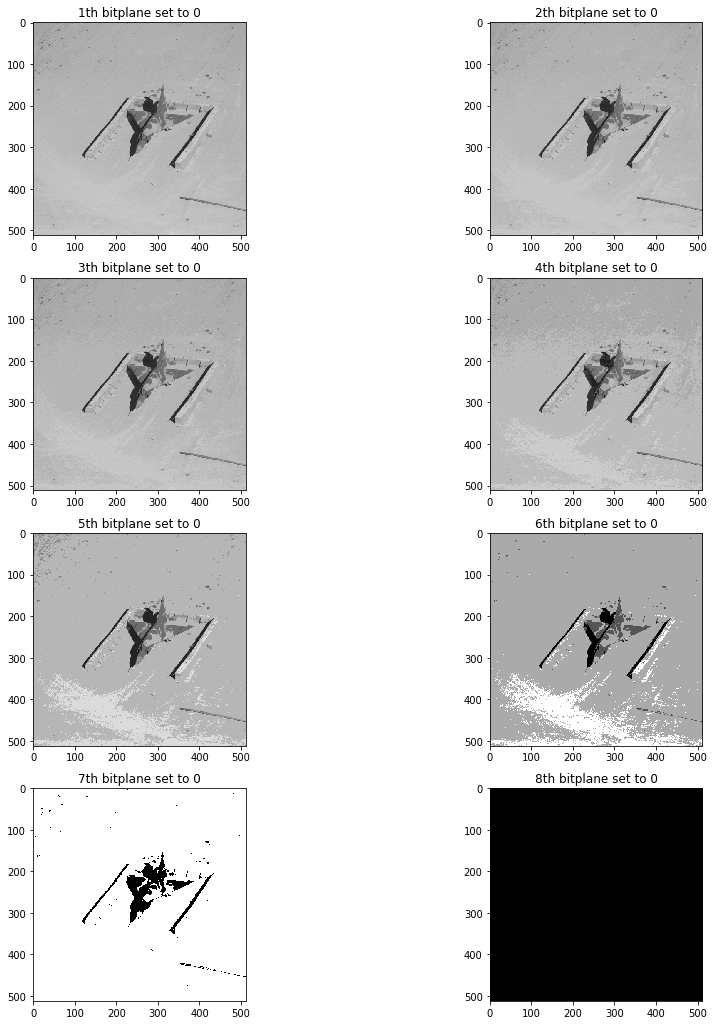

In [16]:
set_zeros_bitplane(airplane)

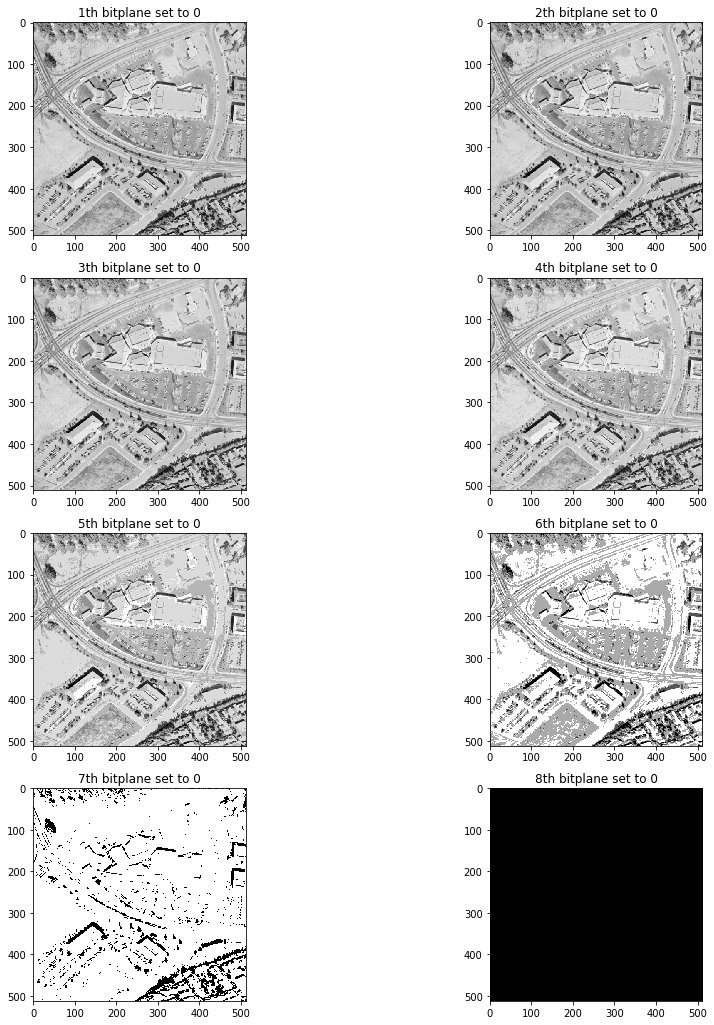

In [17]:
set_zeros_bitplane(aerial)

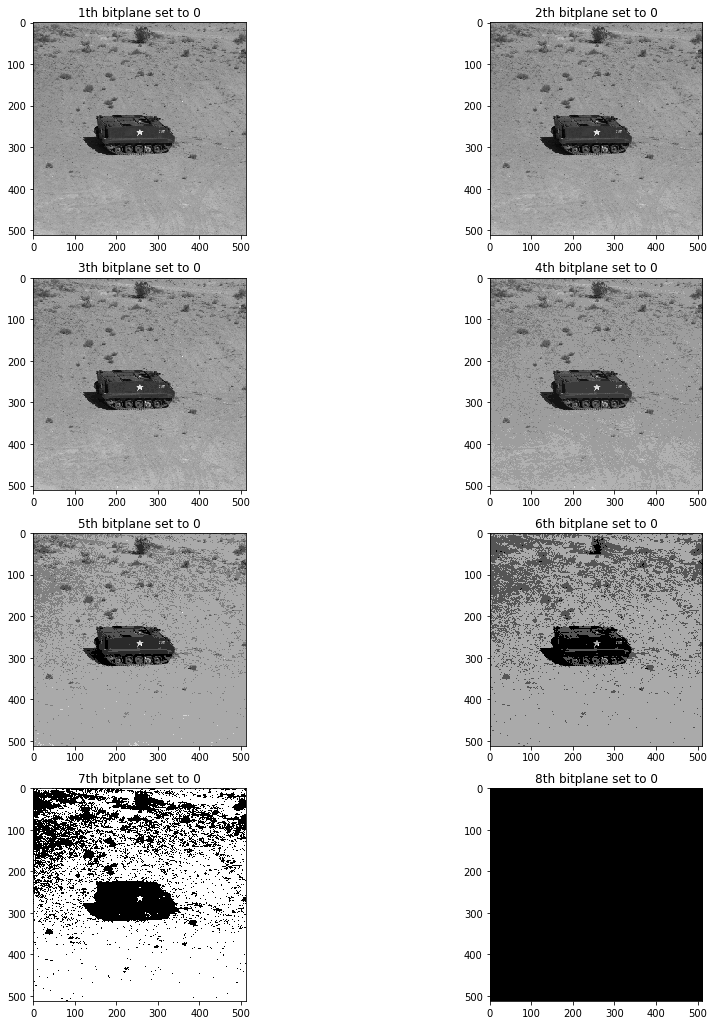

In [18]:
set_zeros_bitplane(APC)

As we can observe from above images, higher bitplane conveys more information than lower bitplane i.e eighth bitplane conveys more information than seventh and seventh conveys more than sixth and so on. Since, higher bitplane has bits corresponding to msb, it shows more information about objects present in image. Also, after setting lower bitplanes to zero, image still conveys almost same information i.e information loss is very less. After last 5 bitplanes are set zero, information loss is significant.

Starting with 256 gray levels (8 bits per pixel), decrease the quantization level by 1 bit per pixel until
you reach 2 gray levels. Re-quantize at each rate and display the resulting image.

In [19]:
# since we have to use level (parameter provided), we have to decrease range of pixel values
# hence we right shift by 1 all pixel values for per decrease in bit. Hence for 128 levels, 7 bit
# will be used
def quantize(image, level):
    width, height = image.shape[1], image.shape[0]
    quantized_image = np.zeros((height, width), dtype='int')
    # gap determines how much we have to right shift
    # for level 128, gap is 2 hence we to right shift by 1
    # that is divide pixel value by 2
    gap = 256/level
    for row in range(height):
        for col in range(width):
            pixel_value = image[row][col]
            # right shifting pixel value 
            nearest_pixel_value = pixel_value/gap
            quantized_image[row][col] = nearest_pixel_value
    return quantized_image

In [20]:
def reduce_quantization_level(image):
    fig=plt.figure(figsize=(15,18))
    quantized_image = np.copy(image)
    # decreasing bits from 8 to 1
    # that is from 256 levels to 2 levels
    for bit in range(8,0,-1):
        level = 1<<(bit)
        quantized_image = quantize(image, level)
        ax=fig.add_subplot(4, 2, 8-bit+1)
        ax.set_title(str(level) + ' gray levels levels')
        ax.imshow(quantized_image)

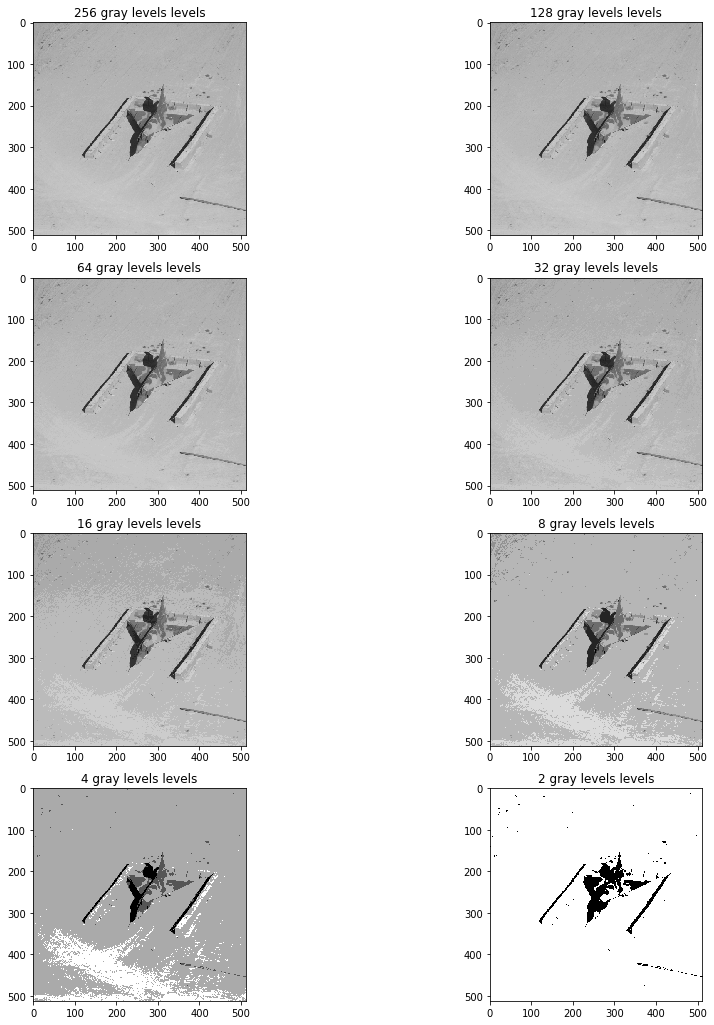

In [21]:
reduce_quantization_level(airplane)

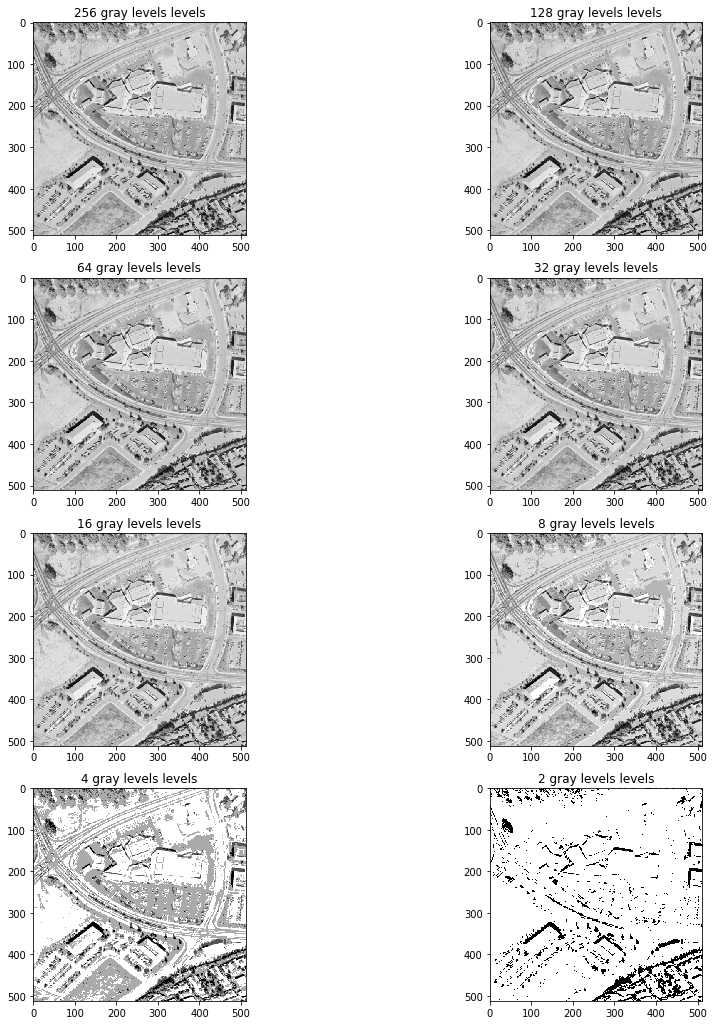

In [22]:
reduce_quantization_level(aerial)

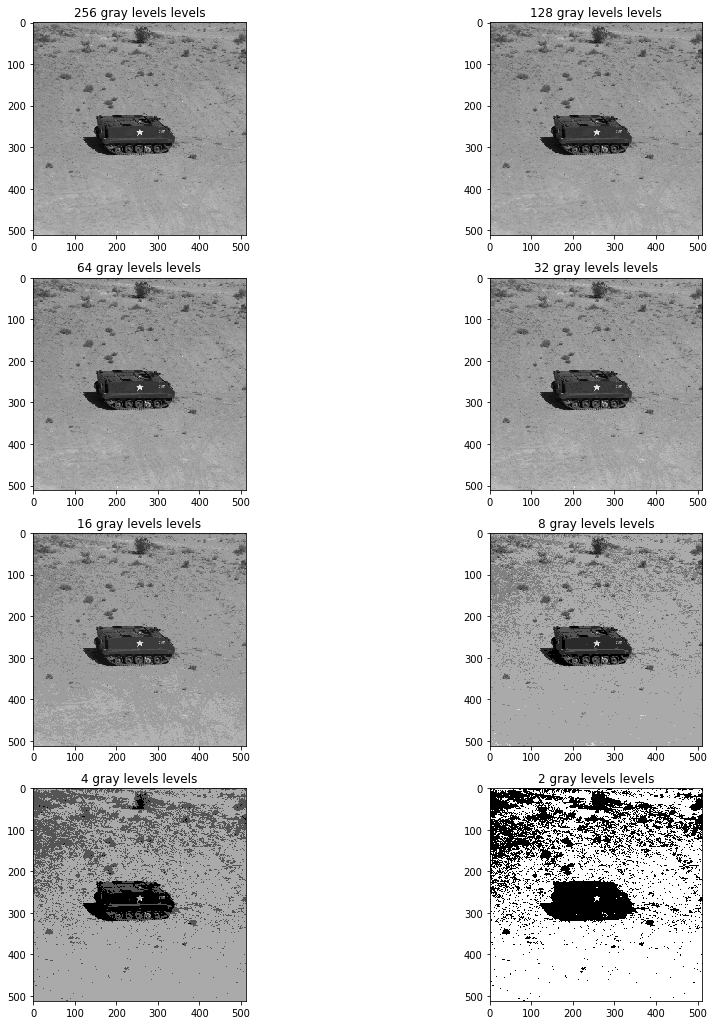

In [23]:
reduce_quantization_level(APC)

# Binary Morphology

# Airplane

Write a function to compute the histogram of an image and plot the same. What is the modality of the
histogram for the images mentioned above? (2)

In [24]:
from collections import defaultdict
def compute_histogram(img):
    width = img.shape[1]
    height = img.shape[0]
    histogram = defaultdict(lambda:0)
    for row in img:
        for pixel_value in row:
            histogram[pixel_value]+=1
    return histogram

def plot_histogram(image):
    plt.figure(figsize=(15,5))
    histogram = compute_histogram(image)
    plt.bar(histogram.keys(), histogram.values(), width=1)

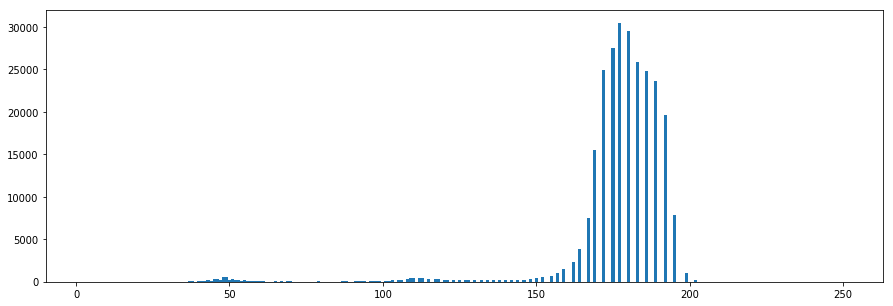

In [25]:
plot_histogram(airplane)

Airplane histogram is unimodal since it has one distinct peak

In [26]:
# reference - https://en.wikipedia.org/wiki/Thresholding_(image_processing)
# automatic thresholding
def global_thresholding(image):
    previous_threshold = 0
    new_threshold = 128
    epsilon = 0.1
    width, height = image.shape[1], image.shape[0]
    while abs(new_threshold-previous_threshold) > epsilon:
        greater_pixels_sum = 0
        lesser_pixels_sum = 0
        greater_pixels_count = 0
        lesser_pixels_count = 0
        for row in range(height):
            for col in range(width):
                if image[row][col] > new_threshold:
                    greater_pixels_sum += image[row][col]
                    greater_pixels_count += 1
                else:
                    lesser_pixels_sum += image[row][col]
                    lesser_pixels_count += 1
        previous_threshold = new_threshold
        new_threshold = 0
        if lesser_pixels_count > 0:
            new_threshold += lesser_pixels_sum/lesser_pixels_count
        if greater_pixels_count > 0:
            new_threshold += greater_pixels_sum/greater_pixels_count
        new_threshold /= 2
        #print(previous_threshold, new_threshold)
    return new_threshold

Binarize I using the above histogram following the modal thresholding approach discussed in class.
Compare this image with the binary image in the last step of the previous problem.

In [27]:
# APC - 85 (99 - global), airplane - 170 (132 - global), truck - 85 (97 - global), airport - 95 (96 - global)
def binarize_image_using_given_threshold(image, threshold):
    histogram = compute_histogram(image)
    width, height = image.shape[1], image.shape[0]
    binary_image = np.zeros((height,width), dtype='int')
    for row in range(height):
        for col in range(width):
            binary_image[row][col] = 1 if image[row][col] > threshold else 0
    return binary_image

In [28]:
def binarize_image_using_global_thresholding(image):
    histogram = compute_histogram(image)
    width, height = image.shape[1], image.shape[0]
    binary_image = np.zeros((height,width), dtype='int')
    threshold = round(global_thresholding(image))
    for row in range(height):
        for col in range(width):
            binary_image[row][col] = 1 if image[row][col] > threshold else 0
    return binary_image

### For airplane, global thresholding works good. Using that global thresholding method, threshold is found as 132. Although, for threshold at 170, good results are obtained

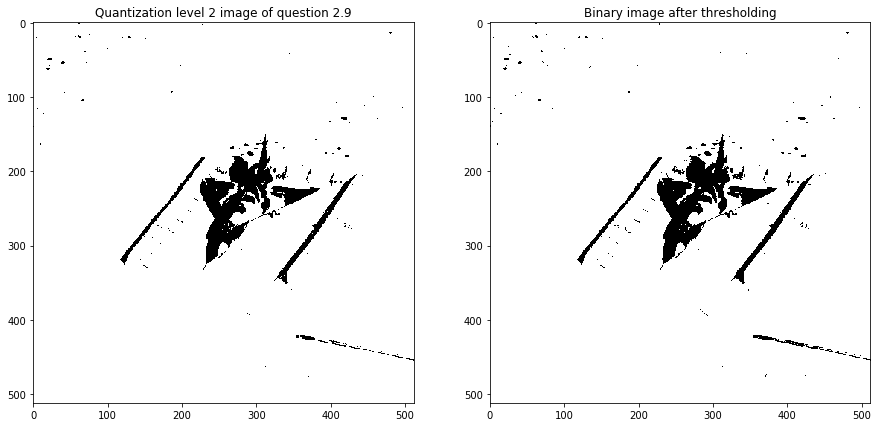

In [29]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Quantization level 2 image of question 2.9')
level_2_image_airplane = quantize(airplane, 2)
ax.imshow(level_2_image_airplane)

binary_image_airplane = binarize_image_using_global_thresholding(airplane)
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Binary image after thresholding')
ax.imshow(binary_image_airplane, vmin=0, vmax=1)

The images obtained after quantization of image at level2 is almost same as binary image obtained after thresholding

Implement the connected components algorithm and use it to label the binarized version of I.

In [30]:
def get_connected_components(binary_image):
    width = binary_image.shape[1]
    height = binary_image.shape[0]
    region_label = np.zeros((height,width), dtype='int')
    region_count = 1
    # setting all parents of each pixel as 0 
    parent_region = defaultdict(lambda:0)
    
    # 4-connectivity algorithm
    for row in range(height):
        for col in range(width):
            # for cell (0,0)
            if row==0 and col==0 and binary_image[row][col]==0:
                region_label[0][0] = region_count
                region_count += 1
                continue
            # for cell (0,i)
            if row==0:
                if binary_image[0][col]==0 and binary_image[0][col-1]==1:
                    region_label[0][col] = region_count
                    region_count += 1
                elif binary_image[0][col]==0 and binary_image[0][col-1]==0:
                    region_label[0][col] = region_label[0][col-1]
                continue
            # for cell (i,0)
            if col==0:
                if binary_image[row][0]==0 and binary_image[row-1][0]==1:
                    region_label[row][0] = region_count
                    region_count += 1
                elif binary_image[row][0]==0 and binary_image[row-1][0]==0:
                    region_label[row][0] = region_label[row-1][0]
                continue
            # for other cells
            if binary_image[row-1][col]==1 and binary_image[row][col-1]==1 and binary_image[row][col]==0:
                region_label[row][col] = region_count
                region_count += 1
            elif binary_image[row-1][col]==0 and binary_image[row][col-1]==1 and binary_image[row][col]==0:
                region_label[row][col] = region_label[row-1][col]
            elif binary_image[row-1][col]==1 and binary_image[row][col-1]==0 and binary_image[row][col]==0:
                region_label[row][col] = region_label[row][col-1]
            elif binary_image[row-1][col]==0 and binary_image[row][col-1]==0 and binary_image[row][col]==0:
                # setting label to minimum of left and top label
                region_label[row][col] = min(region_label[row][col-1], region_label[row-1][col])
                # if left and top cells labels are not equal linking them
                # by making parent of greater label as smaller label
                if(region_label[row][col-1] != region_label[row-1][col]):
                    if region_label[row][col-1] < region_label[row-1][col]:
                        parent_region[region_label[row-1][col]] = region_label[row][col-1]
                    else:
                        parent_region[region_label[row][col-1]] = region_label[row-1][col]
    
    # similar to disjoint set or union-find
    # setting each region_label to its parent recursively until
    # the region is its own parent (for below implementation, until 
    # region_label is 0)
    # example if parent(2) - 1 and parent(3) - 2 and parent(1) - 0
    # finally parent(3) -1 
    for region in list(parent_region):
        parent = parent_region[region]
        if parent == 0:
            continue
        while parent_region[parent] != 0:
            parent = parent_region[parent]
        parent_region[region] = parent
    
    # solving the linkage relation between different region labels
    for row in range(1, height):
        for col in range(1, width):
            region_value = region_label[row][col]
            if region_value == 0 or parent_region[region_value] == 0:
                continue
            region_label[row][col] = parent_region[region_value]
    return region_label

In [31]:
region_label_airplane = get_connected_components(binary_image_airplane)

In [32]:
# counting size of each connected region and adding to dictionary label and its size
def region_counting(region_label):
    region_size = defaultdict(lambda:0)
    width, height = region_label.shape[1], region_label.shape[0]
    for row in range(height):
        for col in range(width):
            if region_label[row][col] != 0:
                region_size[region_label[row][col]] += 1
    return region_size

In [33]:
region_size_airplane = region_counting(region_label_airplane)

Implement minor blob removal to get rid of minor blobs.

In [34]:
# taking complement of binary image i.e 0->1 and 1->0
def complement_image(image):
    width, height = image.shape[1], image.shape[0]
    binary_image_complement = np.zeros((height,width), dtype='int')
    for row in range(height):
        for col in range(width):
            binary_image_complement[row][col] = int(not image[row][col])
    return binary_image_complement

# removing minor blobs inside object
def remove_minor_blob(binary_image, region_label, region_size):
    # size of largest connected component
    max_region_size_label = max(region_size, key=region_size.get)
    width, height = binary_image.shape[1], binary_image.shape[0]
    # setting all smaller components region label as 1
    # only retaining largest component reigon
    for row in range(height):
        for col in range(width):
            if binary_image[row][col] == 0 and region_label[row][col] != max_region_size_label:
                binary_image[row][col] = 1
    fig = plt.figure(figsize=(10,30))
    ax = fig.add_subplot(1,3,1)
    ax.set_title('Image after removing smaller components')
    ax.imshow(binary_image, vmin=0, vmax=1)
    binary_image_complement = complement_image(binary_image)
    ax = fig.add_subplot(1,3,2)
    ax.set_title('Complement Image')
    ax.imshow(binary_image_complement, vmin=0, vmax=1)
    
    # taking complement of image
    complement_image_region_label = get_connected_components(binary_image_complement)
    # counting blob sizes
    complement_image_region_size = region_counting(complement_image_region_label)
    max_region_blob_size = max(complement_image_region_size, key=complement_image_region_size.get)
    # removing minor or smaller blobs
    for row in range(height):
        for col in range(width):
            if binary_image_complement[row][col] == 0 and complement_image_region_label[row][col] != max_region_blob_size:
                binary_image_complement[row][col] = 1
    
    no_minor_blobs_image = complement_image(binary_image_complement)
    ax = fig.add_subplot(1,3,3)
    ax.set_title('Image after removing minor blobs')
    ax.imshow(no_minor_blobs_image, vmin=0, vmax=1)
    return no_minor_blobs_image

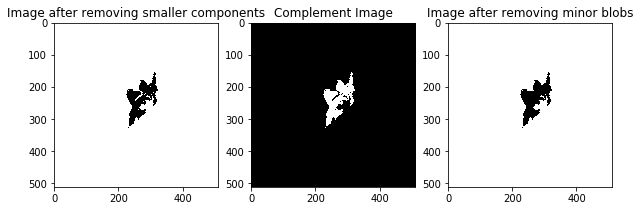

In [35]:
binary_image_airplane = remove_minor_blob(binary_image_airplane, region_label_airplane, region_size_airplane)

Now implement the following filters that take a binary image I and window B as inputs: DILATE,
ERODE, MEDIAN. Filter the above binary image using the following windows B = CROSS(5), B =
SQUARE(3).

In [36]:
# returns true if given coordinates is within image
def is_in_range(x, y, width, height):
    if x < 0 or y < 0  or x >= height or y >= width:
        return False
    return True

# finding nearest neigbour inside image of given coordinate if 
# given coordinate is outside the image
def replicate_with_nearest_neighbour(x, y, width, height):
    nearest_x, nearest_y = 0, 0
    if x>=0 and x<width:
        nearest_x = x
        nearest_y = 0 if abs(y-0)<abs(y-(height-1)) else (height-1)
        return (nearest_x, nearest_y)
    if y>=0 and y<height:
        nearest_x = 0 if abs(x-0)<abs(x-(width-1)) else (width-1)
        nearest_y = y
        return (nearest_x, nearest_y)
    nearest_x = 0 if abs(x-0)<abs(x-(width-1)) else (width-1)
    nearest_y = 0 if abs(y-0)<abs(y-(height-1)) else (height-1)
    return (nearest_x, nearest_y)

# dilate filter
def dilate_filter(binary_image, window):
    width, height = binary_image.shape[1], binary_image.shape[0]
    dilated_image = np.zeros((height,width), dtype='int')
    for row in range(height):
        for col in range(width):
            pixel_value = 0
            # taking bitwise OR of all pixel inside window
            for shifts in window:
                shift_x, shift_y = shifts[0], shifts[1]
                if is_in_range(row-shift_x, col-shift_y, width, height):
                    pixel_value |= binary_image[row-shift_x][col-shift_y]
                else:
                    nearest_x, nearest_y = replicate_with_nearest_neighbour(row-shift_x, col-shift_y, width, height)
                    pixel_value |= binary_image[nearest_y][nearest_x]
            dilated_image[row][col] = pixel_value
    return dilated_image

# erode filter
def erode_filter(binary_image, window):
    width, height = binary_image.shape[1], binary_image.shape[0]
    eroded_image = np.zeros((height,width), dtype='int')
    for row in range(height):
        for col in range(width):
            pixel_value = (1<<8)-1
            # taking bitwise AMD of all pixel inside window
            for shifts in window:
                shift_x, shift_y = shifts[0], shifts[1]
                if is_in_range(row-shift_x, col-shift_y, width, height):
                    pixel_value &= binary_image[row-shift_x][col-shift_y]
                else:
                    nearest_x, nearest_y = replicate_with_nearest_neighbour(row-shift_x, col-shift_y, width, height)
                    pixel_value &= binary_image[nearest_y][nearest_x]
            eroded_image[row][col] = pixel_value
    return eroded_image

# median filter
def median_filter(binary_image, window):
    width, height = binary_image.shape[1], binary_image.shape[0]
    median_image = np.zeros((height,width), dtype='int')
    for row in range(height):
        for col in range(width):
            # list of all pixels inside window
            window_values = []
            for shifts in window:
                shift_x, shift_y = shifts[0], shifts[1]
                if is_in_range(row-shift_x, col-shift_y, width, height):
                    window_values.append(binary_image[row-shift_x][col-shift_y])
                else:
                    nearest_x, nearest_y = replicate_with_nearest_neighbour(row-shift_x, col-shift_y, width, height)
                    window_values.append(binary_image[nearest_y][nearest_x])
            # finding median of all pixels inside window
            median_image[row][col] = np.median(window_values)
    return median_image

In [37]:
# CROSS(5)
CROSS_5 = [[0,0], [0,-1], [0,-2], [0,1], [0,2], [1,0], [2, 0], [-1, 0], [-2,0]]
# SQUARE(3)
SQUARE_3 = [[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]]

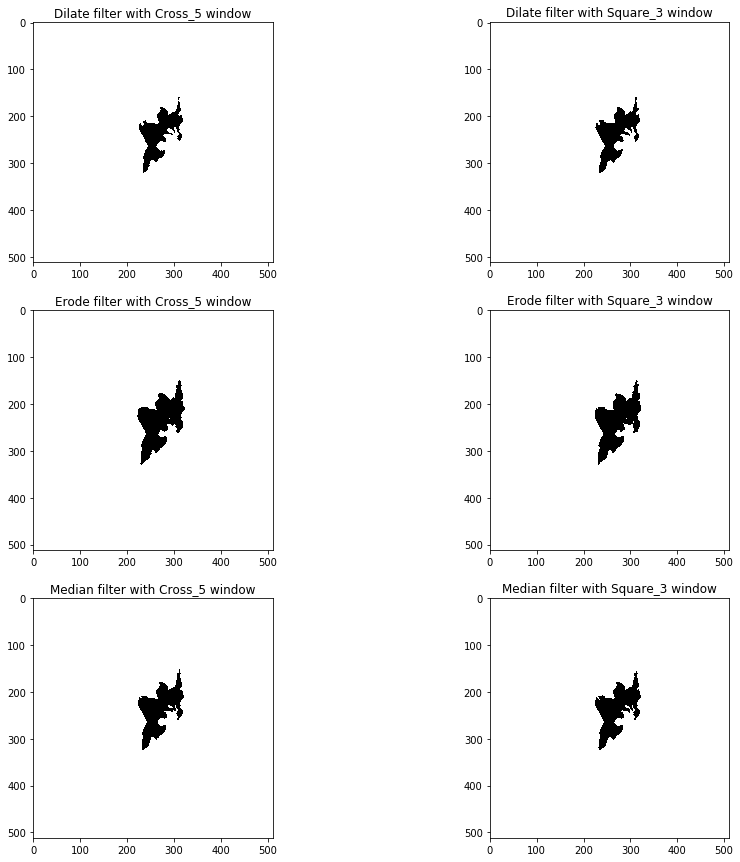

In [38]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(3,2,1)
ax.set_title('Dilate filter with Cross_5 window')
cross_dilate_image = dilate_filter(binary_image_airplane, CROSS_5)
ax.imshow(cross_dilate_image)

ax = fig.add_subplot(3,2,2)
ax.set_title('Dilate filter with Square_3 window')
square_dilate_image = dilate_filter(binary_image_airplane, SQUARE_3)
ax.imshow(square_dilate_image)

ax = fig.add_subplot(3,2,3)
ax.set_title('Erode filter with Cross_5 window')
cross_erode_image = erode_filter(binary_image_airplane, CROSS_5)
ax.imshow(cross_erode_image)

ax = fig.add_subplot(3,2,4)
ax.set_title('Erode filter with Square_3 window')
square_erode_image = erode_filter(binary_image_airplane, SQUARE_3)
ax.imshow(square_erode_image)

ax = fig.add_subplot(3,2,5)
ax.set_title('Median filter with Cross_5 window')
cross_median_image = median_filter(binary_image_airplane, CROSS_5)
ax.imshow(cross_median_image)

ax = fig.add_subplot(3,2,6)
ax.set_title('Median filter with Square_3 window')
square_median_image = median_filter(binary_image_airplane, SQUARE_3)
ax.imshow(square_median_image)

Since erode takes AND of window pixels hence it increases number of 0 valued pixels, hence we see black colored airplane size expanded, as opposed to dilate filter which takes OR of window pixels hence number of 1 valued pixel increases i.e. amount of white pixels increases hence object size contracted somewhat. Median filter will be similar to dilate filter since if in window if number of white pixels are more than black ones, it will set as white since white would be median. 

Implement the compound operators OPEN and CLOSE using the basic filters implemented above.
Filter the binary image from the problem before last using the same windows as above.

In [39]:
def open_operator(binary_image, window):
    eroded_image = erode_filter(binary_image, window)
    dilated_image = dilate_filter(eroded_image, window)
    return dilated_image

def close_operator(binary_image, window):
    dilated_image = dilate_filter(binary_image, window)
    eroded_image = erode_filter(dilated_image, window)
    return eroded_image

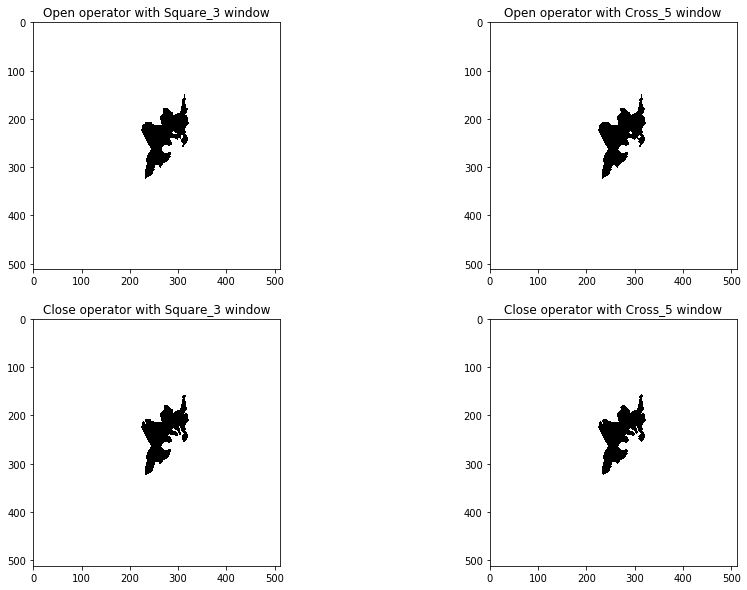

In [40]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2,2,1)
ax.set_title('Open operator with Square_3 window')
square_open_operated_image = open_operator(binary_image_airplane, SQUARE_3)
ax.imshow(square_open_operated_image)

ax = fig.add_subplot(2,2,2)
ax.set_title('Open operator with Cross_5 window')
cross_open_operated_image = open_operator(binary_image_airplane, CROSS_5)
ax.imshow(cross_open_operated_image)

ax = fig.add_subplot(2,2,3)
ax.set_title('Close operator with Square_3 window')
square_close_operated_image = close_operator(binary_image_airplane, SQUARE_3)
ax.imshow(square_close_operated_image)

ax = fig.add_subplot(2,2,4)
ax.set_title('Close operator with Cross_5 window')
cross_close_operated_image = close_operator(binary_image_airplane, CROSS_5)
ax.imshow(cross_close_operated_image)

Finally, implement OPEN-CLOS and CLOS-OPEN. Filter the binary image using the same windows
as above.

In [41]:
def open_close_operator(binary_image, window):
    close_operator_image = close_operator(binary_image, window)
    open_operator_image = open_operator(close_operator_image, window)
    return open_operator_image

def close_open_operator(binary_image, window):
    open_operator_image = close_operator(binary_image, window)
    close_operator_image = open_operator(open_operator_image, window)
    return close_operator_image

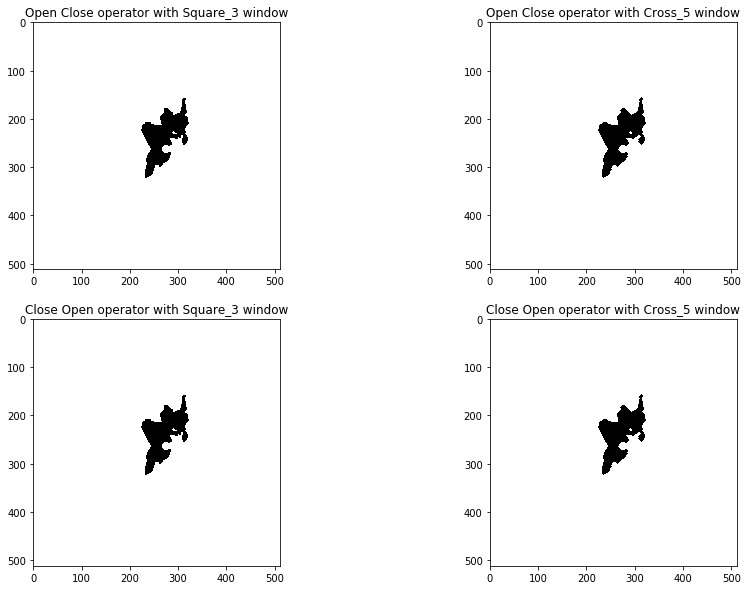

In [42]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2,2,1)
ax.set_title('Open Close operator with Square_3 window')
square_open_close_operated_image = open_close_operator(binary_image_airplane, SQUARE_3)
ax.imshow(square_open_close_operated_image)

ax = fig.add_subplot(2,2,2)
ax.set_title('Open Close operator with Cross_5 window')
cross_open_close_operated_image = open_close_operator(binary_image_airplane, CROSS_5)
ax.imshow(cross_open_close_operated_image)

ax = fig.add_subplot(2,2,3)
ax.set_title('Close Open operator with Square_3 window')
square_close_open_operated_image = close_open_operator(binary_image_airplane, SQUARE_3)
ax.imshow(square_close_open_operated_image)

ax = fig.add_subplot(2,2,4)
ax.set_title('Close Open operator with Cross_5 window')
cross_close_open_operated_image = close_open_operator(binary_image_airplane, CROSS_5)
ax.imshow(cross_close_open_operated_image)

For the APC image, count the number of pixels in the object of interest - i.e., the military vehicle.

In [43]:
def count_pixels(binary_image):
    pixels_count = 0
    width, height = binary_image.shape[1], binary_image.shape[0]
    for row in range(width):
        for col in range(height):
            pixels_count += int(binary_image[row][col])
    return pixels_count

# Truck

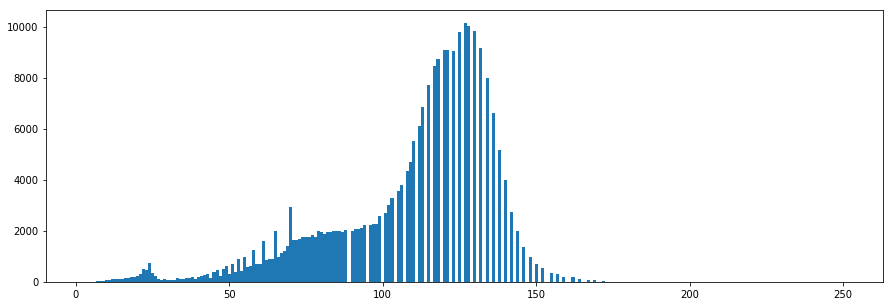

In [44]:
plot_histogram(truck)

### Truck doesn't work well with global thresholding obtained threshold by this is 97
### While for threshold as 85, good results are obtained.

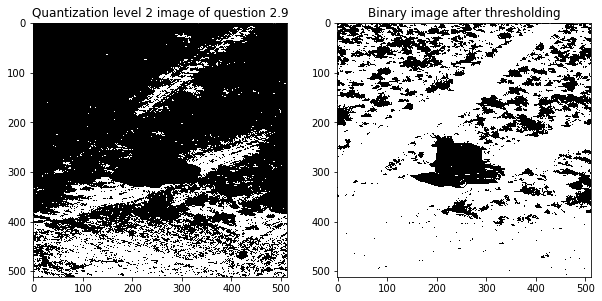

In [45]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Quantization level 2 image of question 2.9')
level_2_image_truck = quantize(truck, 2)
ax.imshow(level_2_image_truck)

binary_image_truck = binarize_image_using_given_threshold(truck, 85)
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Binary image after thresholding')
ax.imshow(binary_image_truck, vmin=0, vmax=1)

In [46]:
region_label_truck = get_connected_components(binary_image_truck)

In [47]:
region_size_truck = region_counting(region_label_truck)

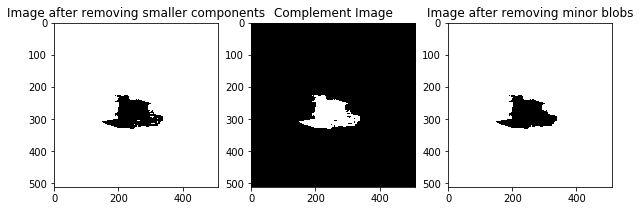

In [48]:
binary_image_truck_no_blobs = remove_minor_blob(binary_image_truck, region_label_truck, region_size_truck)

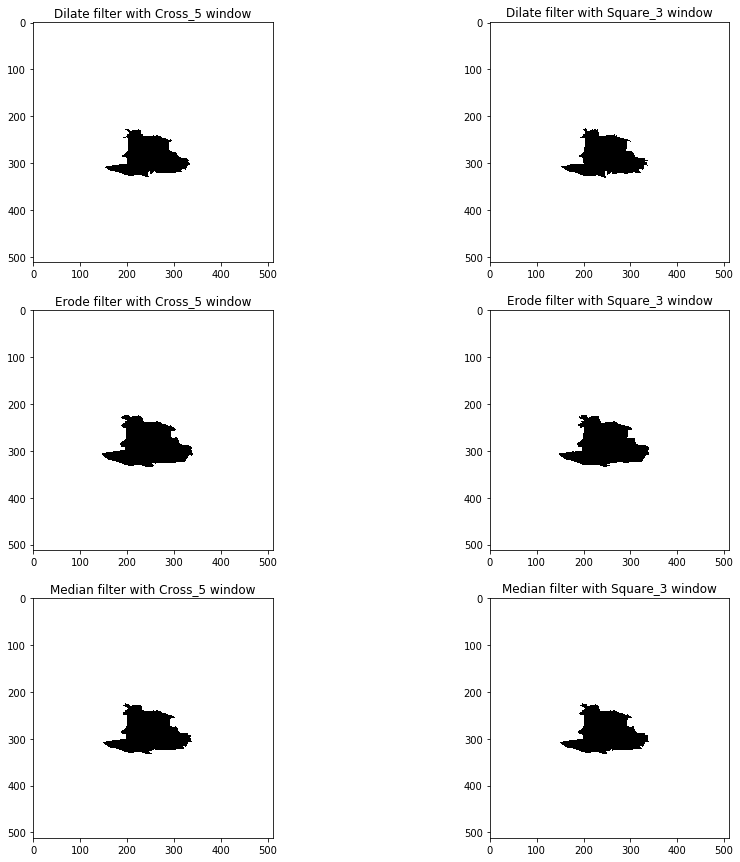

In [49]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(3,2,1)
ax.set_title('Dilate filter with Cross_5 window')
cross_dilate_image = dilate_filter(binary_image_truck_no_blobs, CROSS_5)
ax.imshow(cross_dilate_image)

ax = fig.add_subplot(3,2,2)
ax.set_title('Dilate filter with Square_3 window')
square_dilate_image = dilate_filter(binary_image_truck_no_blobs, SQUARE_3)
ax.imshow(square_dilate_image)

ax = fig.add_subplot(3,2,3)
ax.set_title('Erode filter with Cross_5 window')
cross_erode_image = erode_filter(binary_image_truck_no_blobs, CROSS_5)
ax.imshow(cross_erode_image)

ax = fig.add_subplot(3,2,4)
ax.set_title('Erode filter with Square_3 window')
square_erode_image = erode_filter(binary_image_truck_no_blobs, SQUARE_3)
ax.imshow(square_erode_image)

ax = fig.add_subplot(3,2,5)
ax.set_title('Median filter with Cross_5 window')
cross_median_image = median_filter(binary_image_truck_no_blobs, CROSS_5)
ax.imshow(cross_median_image)

ax = fig.add_subplot(3,2,6)
ax.set_title('Median filter with Square_3 window')
square_median_image = median_filter(binary_image_truck_no_blobs, SQUARE_3)
ax.imshow(square_median_image)

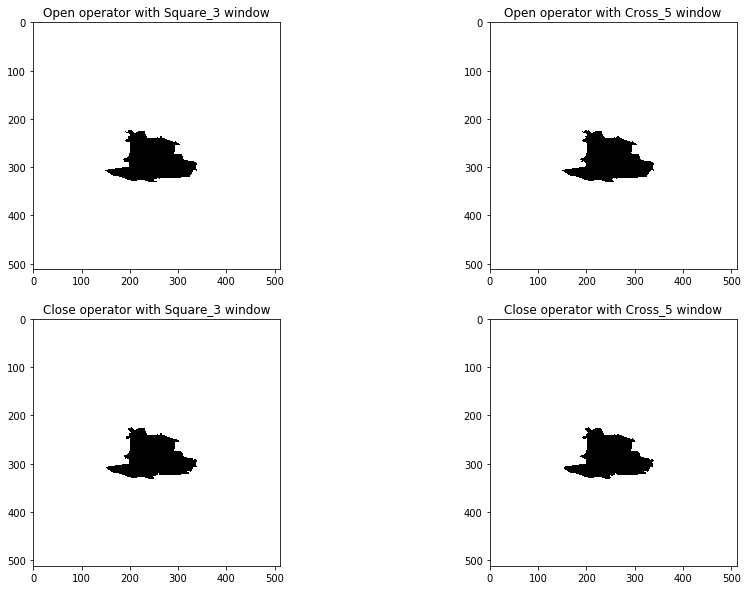

In [50]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2,2,1)
ax.set_title('Open operator with Square_3 window')
square_open_operated_image = open_operator(binary_image_truck_no_blobs, SQUARE_3)
ax.imshow(square_open_operated_image)

ax = fig.add_subplot(2,2,2)
ax.set_title('Open operator with Cross_5 window')
cross_open_operated_image = open_operator(binary_image_truck_no_blobs, CROSS_5)
ax.imshow(cross_open_operated_image)

ax = fig.add_subplot(2,2,3)
ax.set_title('Close operator with Square_3 window')
square_close_operated_image = close_operator(binary_image_truck_no_blobs, SQUARE_3)
ax.imshow(square_close_operated_image)

ax = fig.add_subplot(2,2,4)
ax.set_title('Close operator with Cross_5 window')
cross_close_operated_image = close_operator(binary_image_truck_no_blobs, CROSS_5)
ax.imshow(cross_close_operated_image)

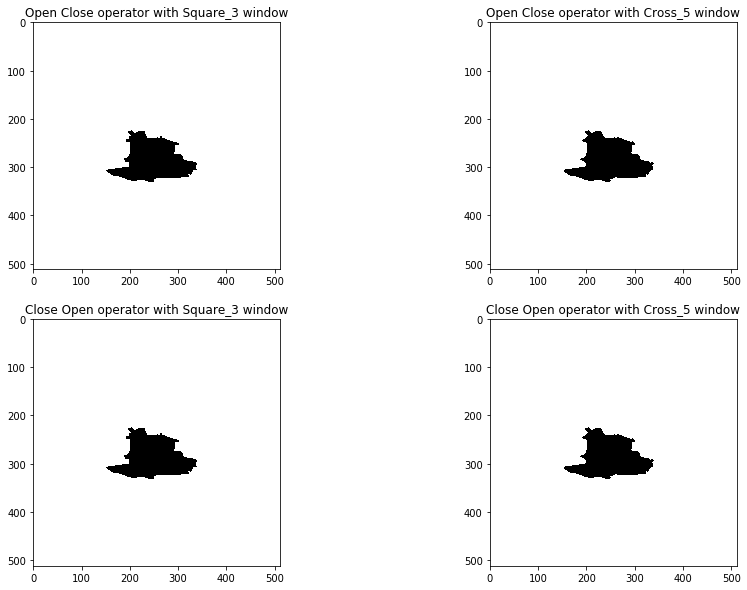

In [51]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2,2,1)
ax.set_title('Open Close operator with Square_3 window')
square_open_close_operated_image = open_close_operator(binary_image_truck_no_blobs, SQUARE_3)
ax.imshow(square_open_close_operated_image)

ax = fig.add_subplot(2,2,2)
ax.set_title('Open Close operator with Cross_5 window')
cross_open_close_operated_image = open_close_operator(binary_image_truck_no_blobs, CROSS_5)
ax.imshow(cross_open_close_operated_image)

ax = fig.add_subplot(2,2,3)
ax.set_title('Close Open operator with Square_3 window')
square_close_open_operated_image = close_open_operator(binary_image_truck_no_blobs, SQUARE_3)
ax.imshow(square_close_open_operated_image)

ax = fig.add_subplot(2,2,4)
ax.set_title('Close Open operator with Cross_5 window')
cross_close_open_operated_image = close_open_operator(binary_image_truck_no_blobs, CROSS_5)
ax.imshow(cross_close_open_operated_image)

# Airport

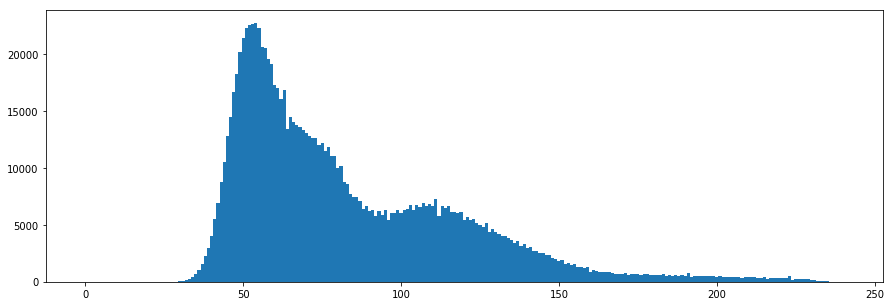

In [52]:
plot_histogram(airport)

Since, airport histogram has only one distinct peak, histogram is unimodal

### Global thresholding does't work well for airport, threshold comes out to be 95.
### While for threshold 80 it shows some good result

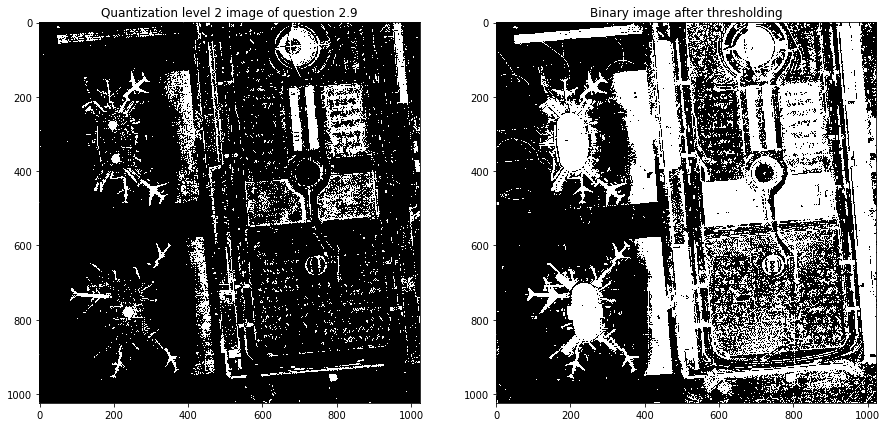

In [53]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Quantization level 2 image of question 2.9')
level_2_image_airport = quantize(airport, 2)
ax.imshow(level_2_image_airport)

binary_image_airport = binarize_image_using_given_threshold(airport, 80)
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Binary image after thresholding')
ax.imshow(binary_image_airport, vmin=0, vmax=1)

In [54]:
# taking complement since object of interest in airport is white 
# binary_image_airport = complement_image(binary_image_airport)
region_label_airport = get_connected_components(binary_image_airport)

In [55]:
region_size_airport = region_counting(region_label_airport)

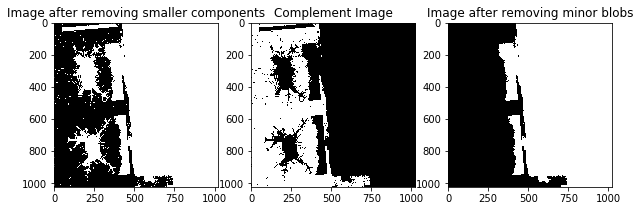

In [56]:
binary_image_airport = remove_minor_blob(binary_image_airport, region_label_airport, region_size_airport)

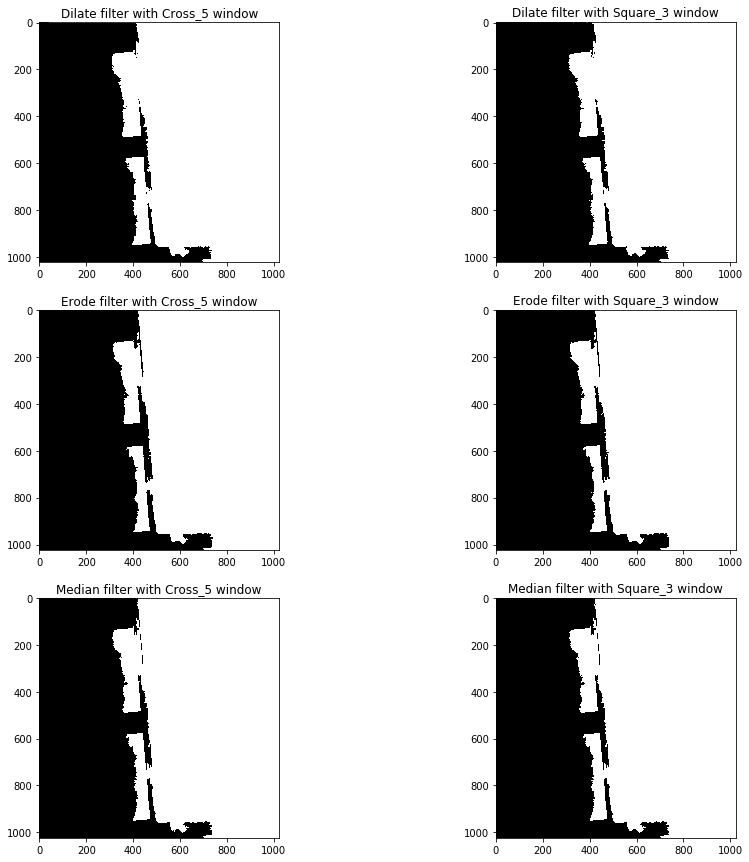

In [57]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(3,2,1)
ax.set_title('Dilate filter with Cross_5 window')
cross_dilate_image = dilate_filter(binary_image_airport, CROSS_5)
ax.imshow(cross_dilate_image)

ax = fig.add_subplot(3,2,2)
ax.set_title('Dilate filter with Square_3 window')
square_dilate_image = dilate_filter(binary_image_airport, SQUARE_3)
ax.imshow(square_dilate_image)

ax = fig.add_subplot(3,2,3)
ax.set_title('Erode filter with Cross_5 window')
cross_erode_image = erode_filter(binary_image_airport, CROSS_5)
ax.imshow(cross_erode_image)

ax = fig.add_subplot(3,2,4)
ax.set_title('Erode filter with Square_3 window')
square_erode_image = erode_filter(binary_image_airport, SQUARE_3)
ax.imshow(square_erode_image)

ax = fig.add_subplot(3,2,5)
ax.set_title('Median filter with Cross_5 window')
cross_median_image = median_filter(binary_image_airport, CROSS_5)
ax.imshow(cross_median_image)

ax = fig.add_subplot(3,2,6)
ax.set_title('Median filter with Square_3 window')
square_median_image = median_filter(binary_image_airport, SQUARE_3)
ax.imshow(square_median_image)

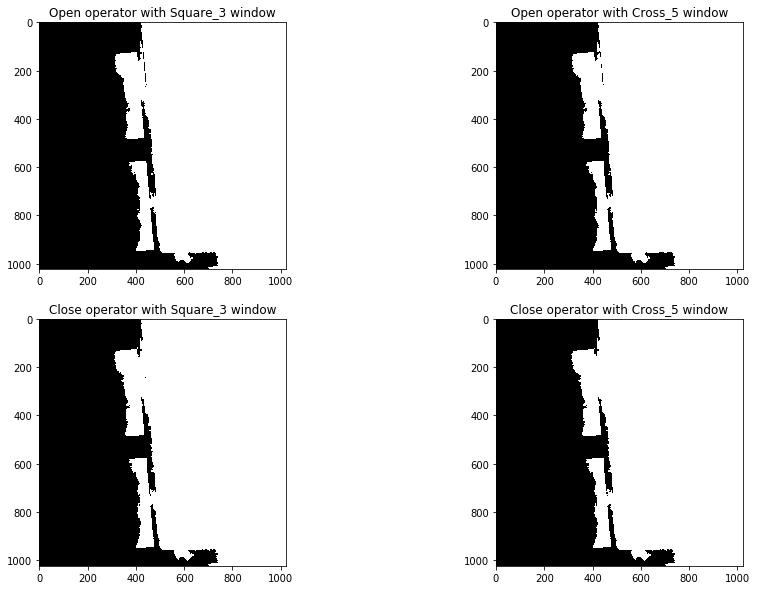

In [58]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2,2,1)
ax.set_title('Open operator with Square_3 window')
square_open_operated_image = open_operator(binary_image_airport, SQUARE_3)
ax.imshow(square_open_operated_image)

ax = fig.add_subplot(2,2,2)
ax.set_title('Open operator with Cross_5 window')
cross_open_operated_image = open_operator(binary_image_airport, CROSS_5)
ax.imshow(cross_open_operated_image)

ax = fig.add_subplot(2,2,3)
ax.set_title('Close operator with Square_3 window')
square_close_operated_image = close_operator(binary_image_airport, SQUARE_3)
ax.imshow(square_close_operated_image)

ax = fig.add_subplot(2,2,4)
ax.set_title('Close operator with Cross_5 window')
cross_close_operated_image = close_operator(binary_image_airport, CROSS_5)
ax.imshow(cross_close_operated_image)

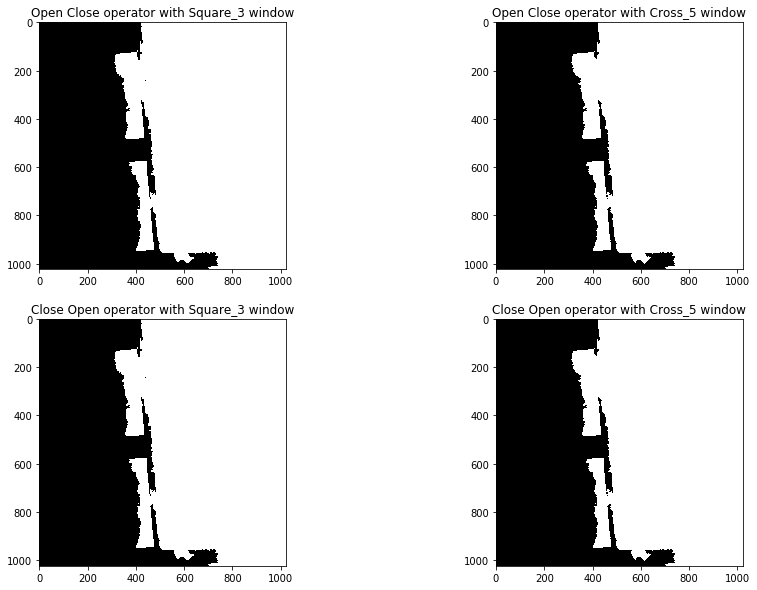

In [59]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2,2,1)
ax.set_title('Open Close operator with Square_3 window')
square_open_close_operated_image = open_close_operator(binary_image_airport, SQUARE_3)
ax.imshow(square_open_close_operated_image)

ax = fig.add_subplot(2,2,2)
ax.set_title('Open Close operator with Cross_5 window')
cross_open_close_operated_image = open_close_operator(binary_image_airport, CROSS_5)
ax.imshow(cross_open_close_operated_image)

ax = fig.add_subplot(2,2,3)
ax.set_title('Close Open operator with Square_3 window')
square_close_open_operated_image = close_open_operator(binary_image_airport, SQUARE_3)
ax.imshow(square_close_open_operated_image)

ax = fig.add_subplot(2,2,4)
ax.set_title('Close Open operator with Cross_5 window')
cross_close_open_operated_image = close_open_operator(binary_image_airport, CROSS_5)
ax.imshow(cross_close_open_operated_image)

# APC 

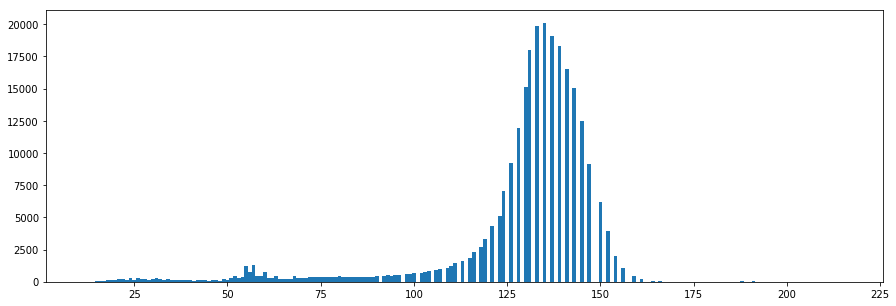

In [60]:
plot_histogram(APC)

Since, histogram has only one distinct peak. APC histogram is unimodal.

In [61]:
### APC works well for global thresholding method, threshold comes out to be 99

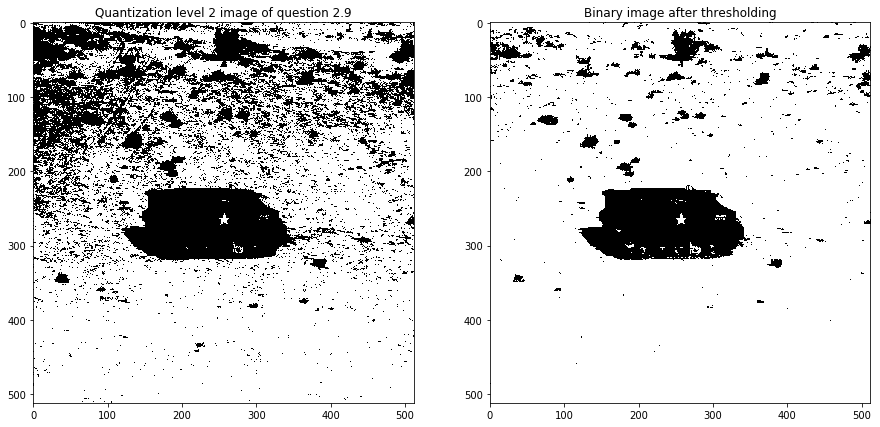

In [62]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Quantization level 2 image of question 2.9')
level_2_image_apc = quantize(APC, 2)
ax.imshow(level_2_image_apc)

binary_image_apc = binarize_image_using_global_thresholding(APC)
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Binary image after thresholding')
ax.imshow(binary_image_apc, vmin=0, vmax=1)

In [63]:
region_label_apc = get_connected_components(binary_image_apc)

In [64]:
region_size_apc = region_counting(region_label_apc)

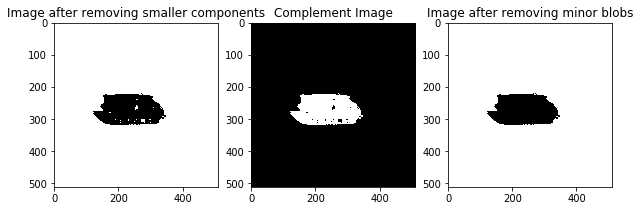

In [65]:
binary_image_apc = remove_minor_blob(binary_image_apc, region_label_apc, region_size_apc)

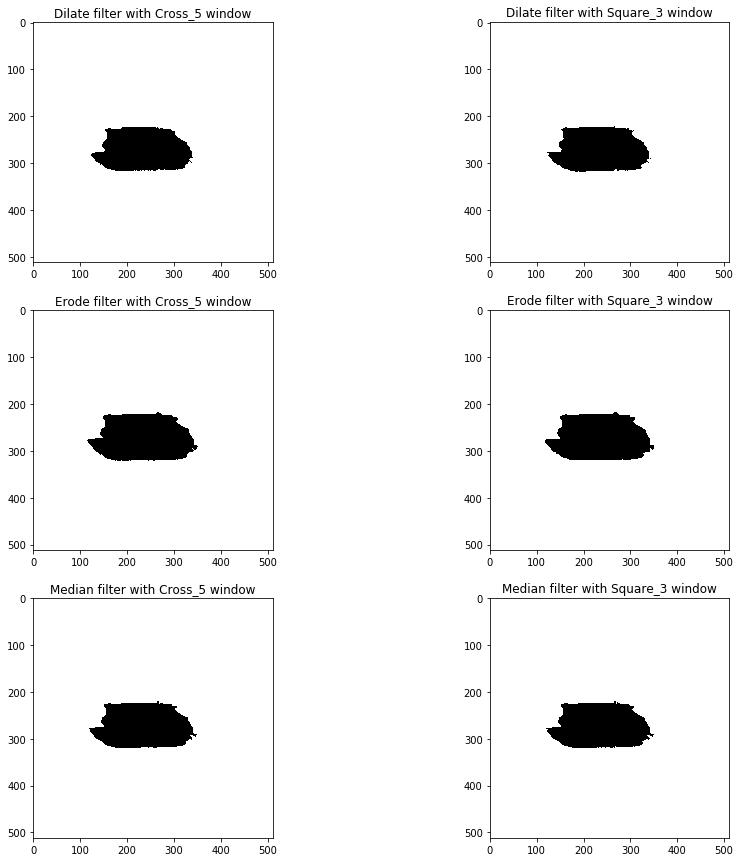

In [66]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(3,2,1)
ax.set_title('Dilate filter with Cross_5 window')
cross_dilate_image = dilate_filter(binary_image_apc, CROSS_5)
ax.imshow(cross_dilate_image)

ax = fig.add_subplot(3,2,2)
ax.set_title('Dilate filter with Square_3 window')
square_dilate_image = dilate_filter(binary_image_apc, SQUARE_3)
ax.imshow(square_dilate_image)

ax = fig.add_subplot(3,2,3)
ax.set_title('Erode filter with Cross_5 window')
cross_erode_image = erode_filter(binary_image_apc, CROSS_5)
ax.imshow(cross_erode_image)

ax = fig.add_subplot(3,2,4)
ax.set_title('Erode filter with Square_3 window')
square_erode_image = erode_filter(binary_image_apc, SQUARE_3)
ax.imshow(square_erode_image)

ax = fig.add_subplot(3,2,5)
ax.set_title('Median filter with Cross_5 window')
cross_median_image = median_filter(binary_image_apc, CROSS_5)
ax.imshow(cross_median_image)

ax = fig.add_subplot(3,2,6)
ax.set_title('Median filter with Square_3 window')
square_median_image = median_filter(binary_image_apc, SQUARE_3)
ax.imshow(square_median_image)

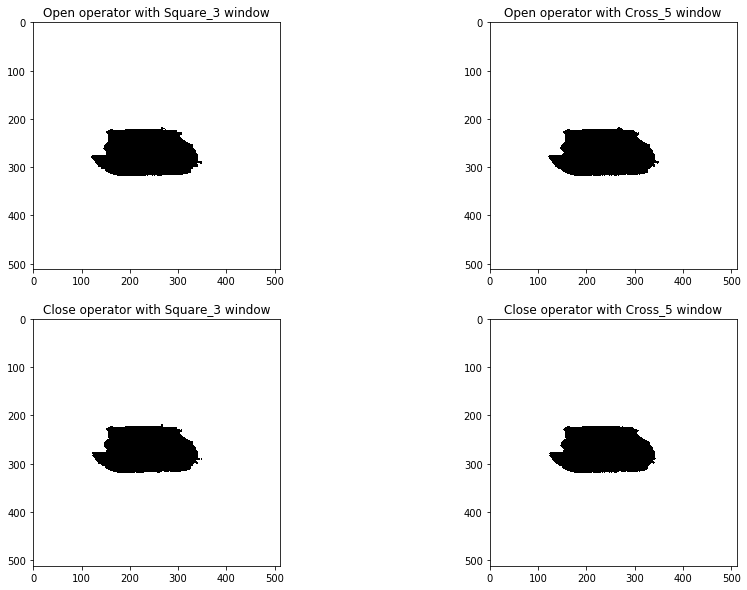

In [67]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2,2,1)
ax.set_title('Open operator with Square_3 window')
square_open_operated_image = open_operator(binary_image_apc, SQUARE_3)
ax.imshow(square_open_operated_image)

ax = fig.add_subplot(2,2,2)
ax.set_title('Open operator with Cross_5 window')
cross_open_operated_image = open_operator(binary_image_apc, CROSS_5)
ax.imshow(cross_open_operated_image)

ax = fig.add_subplot(2,2,3)
ax.set_title('Close operator with Square_3 window')
square_close_operated_image = close_operator(binary_image_apc, SQUARE_3)
ax.imshow(square_close_operated_image)

ax = fig.add_subplot(2,2,4)
ax.set_title('Close operator with Cross_5 window')
cross_close_operated_image = close_operator(binary_image_apc, CROSS_5)
ax.imshow(cross_close_operated_image)

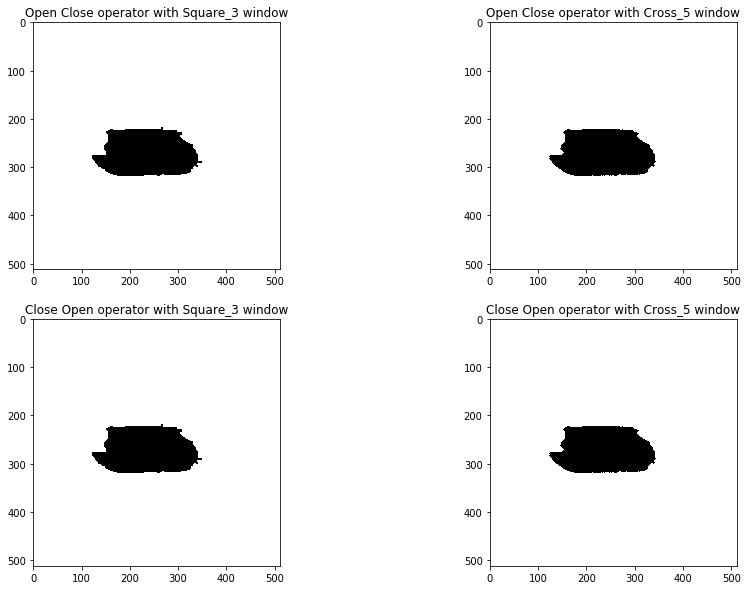

In [68]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2,2,1)
ax.set_title('Open Close operator with Square_3 window')
square_open_close_operated_image = open_close_operator(binary_image_apc, SQUARE_3)
ax.imshow(square_open_close_operated_image)

ax = fig.add_subplot(2,2,2)
ax.set_title('Open Close operator with Cross_5 window')
cross_open_close_operated_image = open_close_operator(binary_image_apc, CROSS_5)
ax.imshow(cross_open_close_operated_image)

ax = fig.add_subplot(2,2,3)
ax.set_title('Close Open operator with Square_3 window')
square_close_open_operated_image = close_open_operator(binary_image_apc, SQUARE_3)
ax.imshow(square_close_open_operated_image)

ax = fig.add_subplot(2,2,4)
ax.set_title('Close Open operator with Cross_5 window')
cross_close_open_operated_image = close_open_operator(binary_image_apc, CROSS_5)
ax.imshow(cross_close_open_operated_image)

For the APC image, count the number of pixels in the object of interest - i.e., the military vehicle.

In [70]:
print("The number of pixels in military vehicle are " + str(count_pixels(binary_image_apc)))

The number of pixels in military vehicle are 245046
